In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import time
import pickle
import os

## import self-written packages 
from adafdr.util import *
import adafdr.method as md
import adafdr.data_loader as dl

%matplotlib inline
%load_ext autoreload
%autoreload 2

## simu_2d_bump_slope

In [17]:
plot_list = [
    {'data_name': 'simu_data_adapt',
    'filename': 
     '/home/martin/NeuralFDR2/result_simulation/result_simu_data_adapt/result_dic.pickle',
    'folder_r': '/home/martin/NeuralFDR2/result_simulation/res_R_data_adapt'},
    {'data_name': 'simu_data_ihw',
    'filename': 
     '/home/martin/NeuralFDR2/result_simulation/result_simu_data_ihw/result_dic.pickle',
    'folder_r': '/home/martin/NeuralFDR2/result_simulation/res_R_simu_data_ihw'},
    {'data_name': 'simu_data_wd',
    'filename': 
     '/home/martin/NeuralFDR2/result_simulation/result_simu_data_wd/result_dic.pickle',
    'folder_r': '/home/martin/NeuralFDR2/result_simulation/res_R_simu_data_wd'},
    {'data_name': 'simu_data_sd',
    'filename': 
     '/home/martin/NeuralFDR2/result_simulation/result_simu_data_sd/result_dic.pickle',
    'folder_r': '/home/martin/NeuralFDR2/result_simulation/res_R_simu_data_sd'},
    {'data_name': 'simu_1d_bump_slope',
    'filename': 
     '/home/martin/NeuralFDR2/result_simulation/result_simu_1d_bump_slope/result_dic.pickle',
    'folder_r': '/home/martin/NeuralFDR2/result_simulation/res_R_simu_1d_bump_slope'},
    {'data_name': 'simu_2d_bump_slope',
    'filename': 
     '/home/martin/NeuralFDR2/result_simulation/result_simu_2d_bump_slope/result_dic.pickle',
    'folder_r': '/home/martin/NeuralFDR2/result_simulation/res_R_simu_2d_bump_slope'},
    {'data_name': 'simu_10d_bump_slope',
    'filename': 
     '/home/martin/NeuralFDR2/result_simulation/result_simu_10d_bump_slope/result_dic.pickle',
    'folder_r': '/home/martin/NeuralFDR2/result_simulation/res_R_simu_10d_bump_slope'}
]

In [2]:
plot_list = [
    {'data_name': 'simu_data_adapt',
    'filename': 
     '/home/martin/NeuralFDR2/result_simulation/result_simu_data_adapt/result_dic.pickle',
    'folder_r': '/home/martin/NeuralFDR2/result_simulation/res_R_data_adapt'}
]

simu_data_adapt


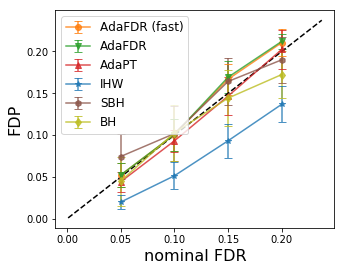

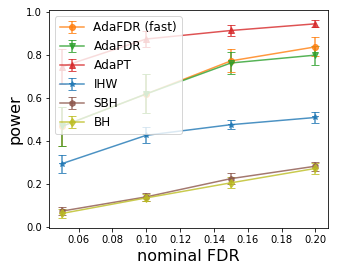

In [3]:
method_mapping_dic = {'nfdr (fast)': 'AdaFDR (fast)',\
                      'nfdr': 'AdaFDR',\
                      'ihw': 'IHW',\
                      'adapt': 'AdaPT',\
                      'bh': 'BH',\
                      'sbh': 'SBH'}
output_folder = '/home/martin/NeuralFDR2/figures/fig_simulation/'
output_folder = None
for config in plot_list:
    data_name = config['data_name']
    res_py = config['filename']
    res_r = config['folder_r']
    print(data_name)
    summary_stats, time_dic = get_summary_stats(filename=res_py, folder_r=res_r)
    plot_size_power(summary_stats, method_mapping_dic,\
                    data_name=data_name, output_folder = output_folder)\

# Speed

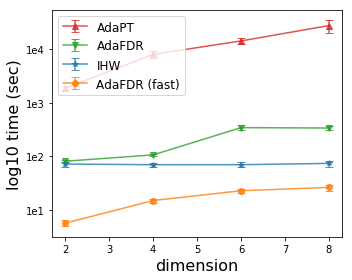

In [19]:
res_py = '/home/martin/NeuralFDR2/result_simulation/result_simu_speed_dim/result_dic.pickle'
res_r = '/home/martin/NeuralFDR2/result_simulation/res_R_simu_speed_dim/time_rec'
marker_list = ['^', 'v', '*', 'o']
# color_list = ['C1', 'C2', 'C3', 'C0']
color_list = ['C3', 'C2', 'C0', 'C1']
# read data
fil = open(res_py, 'rb')
result_dic = pickle.load(fil)
time_dic_py = pickle.load(fil)
fil.close()
temp_data = np.loadtxt(res_r, dtype=str, skiprows=1)
# 
# method_list = ['nfdr (fast)', 'nfdr', 'adapt', 'ihw']
method_list = ['adapt', 'nfdr', 'ihw', 'nfdr (fast)']
method_mapping_dic = {'nfdr (fast)': 'AdaFDR (fast)',\
                      'nfdr': 'AdaFDR',\
                      'ihw': 'IHW',\
                      'adapt': 'AdaPT',\
                      'bh': 'BH',\
                      'sbh': 'SBH'}
time_dic = {}
for method in method_list:
    time_dic[method] = np.zeros([5, 4], dtype=float)
# nfdr and the fast version
for data_name in time_dic_py['nfdr'][0.1]:
    temp = data_name.split('_')
    time_dic['nfdr'][int(temp[2]), int(int(temp[1])/2-1)] = \
        time_dic_py['nfdr'][0.1][data_name]
for data_name in time_dic_py['nfdr (fast)'][0.1]:
    temp = data_name.split('_')
    time_dic['nfdr (fast)'][int(temp[2]), int(int(temp[1])/2-1)] = \
        time_dic_py['nfdr (fast)'][0.1][data_name]
#  adapt and ihw
for data_name in temp_data:
    data_name, time_adapt, time_ihw = data_name.split(',')
    temp = data_name.replace('"', '').split('_')
    time_dic['adapt'][int(temp[2]), int(int(temp[1])/2-1)] = time_adapt
    time_dic['ihw'][int(temp[2]), int(int(temp[1])/2-1)] = time_ihw
# plot the figure
axes = plt.figure(figsize = [5, 4])
n_data = 5
for i_method,method in enumerate(method_list):    
    y_val = np.mean(time_dic[method], axis=0)
    temp_err = np.std(time_dic[method], axis=0) / np.sqrt(n_data) * 1.96
    y_err = np.zeros([2, 4], dtype=float)
    y_err[0, :] = np.log10(y_val) - np.log10(y_val - temp_err) 
    y_err[1, :] = np.log10(y_val + temp_err) - np.log10(y_val)
    plt.errorbar([2, 4, 6, 8], np.log10(y_val), yerr=y_err,\
                 label=method_mapping_dic[method],\
                 capsize=4, elinewidth = 1.5, linewidth=1.5,\
                 color = color_list[i_method], marker = marker_list[i_method],\
                 markersize = 6, alpha=0.8)
plt.legend(loc=2, fontsize=12)
plt.ylabel('log10 time (sec)', fontsize=16)
plt.xlabel('dimension', fontsize=16)
plt.yticks([1, 2, 3, 4], ['1e1', '1e2', '1e3', '1e4'])
plt.tight_layout()
plt.savefig(output_folder+'speed_dim.png')
plt.savefig(output_folder+'speed_dim.pdf')
plt.show()

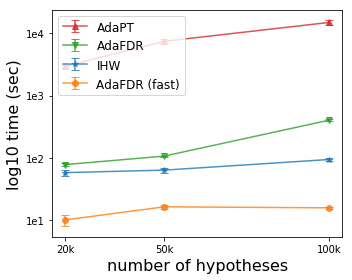

In [20]:
res_py = '/home/martin/NeuralFDR2/result_simulation/result_simu_speed_sample/result_dic.pickle'
res_r = '/home/martin/NeuralFDR2/result_simulation/res_R_simu_speed_sample/time_rec'
# marker_list = ['^', '*', 'h', 'd']
marker_list = ['^', 'v', '*', 'o']
# color_list = ['C1', 'C2', 'C3', 'C0']
color_list = ['C3', 'C2', 'C0', 'C1']
# read data
fil = open(res_py, 'rb')
result_dic = pickle.load(fil)
time_dic_py = pickle.load(fil)
fil.close()
temp_data = np.loadtxt(res_r, dtype=str, skiprows=1)
# 
# method_list = ['nfdr (fast)', 'nfdr', 'adapt', 'ihw']
method_list = ['adapt', 'nfdr', 'ihw', 'nfdr (fast)']
method_mapping_dic = {'nfdr (fast)': 'AdaFDR (fast)',\
                      'nfdr': 'AdaFDR',\
                      'ihw': 'IHW',\
                      'adapt': 'AdaPT',\
                      'bh': 'BH',\
                      'sbh': 'SBH'}
time_dic = {}
for method in method_list:
    time_dic[method] = np.zeros([5, 3], dtype=float)
sample_dic = {'20000': 0, '50000': 1, '100000': 2}
# nfdr and the fast version
for data_name in time_dic_py['nfdr'][0.1]:
    temp = data_name.split('_')
    time_dic['nfdr'][int(temp[2]), sample_dic[temp[1]]] = \
        time_dic_py['nfdr'][0.1][data_name]
for data_name in time_dic_py['nfdr (fast)'][0.1]:
    temp = data_name.split('_')
    time_dic['nfdr (fast)'][int(temp[2]), sample_dic[temp[1]]] = \
        time_dic_py['nfdr (fast)'][0.1][data_name]
#  adapt and ihw
for data_name in temp_data:
    data_name, time_adapt, time_ihw = data_name.split(',')
    temp = data_name.replace('"', '').split('_')
    time_dic['adapt'][int(temp[2]), sample_dic[temp[1]]]= time_adapt
    time_dic['ihw'][int(temp[2]), sample_dic[temp[1]]] = time_ihw
# plot the figure
axes = plt.figure(figsize = [5, 4])
n_data = 5
for i_method,method in enumerate(method_list):    
    y_val = np.mean(time_dic[method], axis=0)
    temp_err = np.std(time_dic[method], axis=0) / np.sqrt(n_data) * 1.96
    y_err = np.zeros([2, 3], dtype=float)
    y_err[0, :] = np.log10(y_val) - np.log10(y_val - temp_err) 
    y_err[1, :] = np.log10(y_val + temp_err) - np.log10(y_val)
    plt.errorbar([20000, 50000, 100000], np.log10(y_val), yerr=y_err,\
                 label=method_mapping_dic[method],\
                 capsize=4, elinewidth = 1.5, linewidth=1.5,\
                 color = color_list[i_method], marker = marker_list[i_method],\
                 markersize = 6, alpha=0.8)
plt.legend(loc=2, fontsize=12)
plt.ylabel('log10 time (sec)', fontsize=16)
plt.xlabel('number of hypotheses', fontsize=16)
plt.yticks([1, 2, 3, 4], ['1e1', '1e2', '1e3', '1e4'])
plt.xticks([20000, 50000, 100000], ['20k', '50k', '100k'])
plt.tight_layout()
plt.savefig(output_folder+'speed_sample.png')
plt.savefig(output_folder+'speed_sample.pdf')
plt.show()

# Results on small data

In [152]:
data_list = [
    {'data_name': 'airway',
    'file_name': '/home/martin/NeuralFDR2/result_simulation/res_R_rna/res_airway'},
    {'data_name': 'bottomly',
    'file_name': '/home/martin/NeuralFDR2/result_simulation/res_R_rna/res_bottomly'},
    {'data_name': 'pasilla',
    'file_name': '/home/martin/NeuralFDR2/result_simulation/res_R_rna/res_pasilla'}
]
for config in data_list:
    print(config['data_name'])
    file_path = config['file_name'] 
    temp_data = np.loadtxt(file_path, skiprows=1, delimiter = ',')
    print('Adapt #D=%d'%np.sum(temp_data[:, 2]))
    print('IHW #D=%d'%np.sum(temp_data[:, 6]))

airway
Adapt #D=6045
IHW #D=4866
bottomly
Adapt #D=2109
IHW #D=1714
pasilla
Adapt #D=853
IHW #D=785


##### temp_data[0,]